#**Importing some necessary libraries which is used for social media monitoring**

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Dataset**


In [2]:
df = pd.read_csv('/content/#iPhone13_2019-09-20.csv')
df

,Unnamed: 0,Datetime,Tweet Id,Text
0,0,2022-03-30 11:50:30+00:00,1509135980300701697,Nice little walk around London shooting with j...
1,1,2022-03-11 10:17:23+00:00,1502227177504448519,We’ve added some new designs to our iPhone cas...
2,2,2022-03-09 00:45:37+00:00,1501358509450883079,Your like a stomach with a big I’m a rare dise...
3,3,2022-03-07 12:42:03+00:00,1500814031359250432,The Harber London Magnetic Envelope Sleeve For...
4,4,2022-02-20 09:19:44+00:00,1495327296705773568,London #Pilotlife #aviation #iphone13 https://...
5,5,2022-02-13 12:54:43+00:00,1492844687446708226,@FlakPhoto One I took on the #iPhone13 on Frid...
6,6,2022-01-15 05:31:35+00:00,1482223920291860480,"… and then I realized, adventure was the best ..."
7,7,2022-01-05 22:33:12+00:00,1478857139045163008,London looking pretty taken with my new camera...
8,8,2022-01-03 07:45:22+00:00,1477908933264109569,Shard London Case-Mate iPhone Case #iPhone #iP...
9,9,2021-12-07 06:33:03+00:00,1468106260473991170,I get mean let rip my jet stream……\n-\n-\n-\n-...


**Check null values**

In [3]:
df.isnull().sum()

Unnamed: 0    0
Datetime      0
Tweet Id      0
Text          0
dtype: int64

**Columns Names**

In [4]:
df.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text'], dtype='object')

**Drop unecessary columns which do not need for further process**

In [56]:
text_df = df.drop(['Unnamed: 0', 'Datetime', 'Tweet Id'], axis=1)
text_df

,Text
0,Nice little walk around London shooting with j...
1,We’ve added some new designs to our iPhone cas...
2,Your like a stomach with a big I’m a rare dise...
3,The Harber London Magnetic Envelope Sleeve For...
4,London #Pilotlife #aviation #iphone13 https://...
5,@FlakPhoto One I took on the #iPhone13 on Frid...
6,"… and then I realized, adventure was the best ..."
7,London looking pretty taken with my new camera...
8,Shard London Case-Mate iPhone Case #iPhone #iP...
9,I get mean let rip my jet stream……\n-\n-\n-\n-...


**Below code is used to print first 3 rows**

In [6]:
print(text_df['Text'].iloc[0],"\n")
print(text_df['Text'].iloc[1],"\n")
print(text_df['Text'].iloc[2],"\n")

Nice little walk around London shooting with just the iPhone 13 pro #london #trains #iphone13 #iphone13pro #londonphotography @ London, United Kingdom https://t.co/ZhNvSlPUyA 

We’ve added some new designs to our iPhone case collection. Whoever said an elephant can’t do 🩰? https://t.co/gnyZCN1h7G #elephant #iPhone13 #iphonecase #tech #artist #ballet #theatre #London #giftsforher @Etsy https://t.co/JMw0FUBIhs 

Your like a stomach with a big I’m a rare disease….,
-
-
-
#iphone #apple #iphone13 #art #popart #ntf #cyrusdavirus #hiphopartist #ukrappers @ London Underground https://t.co/tg6eqe2yaG 



**This function essentially cleans and prepares text data for further analysis by removing noise (URLs, mentions, hashtags, punctuation), standardizing casing, and focusing on meaningful words.**

**Tokenization and Stop word removal**

In [7]:
def data_processing(text): #data_processing that cleans and preprocesses text data

    text = text.lower() #ext.lower() converts all characters in the text to lowercase.

    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE) #removes URLs from the text.

    text = re.sub(r'\@w+|\#','',text) # removes mentions (starting with "@") and hashtags (starting with "#") from the text.

    text = re.sub(r'[^\w\s]','',text) # removes all characters except alphanumeric characters (\w) and whitespace (\s)This removes punctuation, symbols, and special characters.
    text_tokens = word_tokenize(text) #splits the text into individual words (tokens) using the word_tokenize function.

    filtered_text = [w for w in text_tokens if not w in stop_words] #removes stop words from the tokenized text. Stop words are common words that don't carry much meaning in the context of analysis (e.g., "the", "a", "is").
    return " ".join(filtered_text) #joins the filtered tokens (words remaining after stop word removal) back into a string separated by spaces.

In [8]:
nltk.download('punkt') #split text into words (tokens).
#applies the data_processing function to each text entry in the "Text" column of a pandas DataFrame named text_df.
#The result (cleaned text) is then stored in a new column named "text" within the DataFrame.

text_df.text = text_df['Text'].apply(data_processing)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-8-7a53eee98efb>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  text_df.text = text_df['Text'].apply(data_processing)


In [9]:
text_df = text_df.drop_duplicates('Text')

In [10]:
# stemming (reducing words to their base form)
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [11]:
text_df['Text'] = text_df['Text'].apply(lambda x: stemming(x))

In [12]:
text_df.tail()

,Text
36,🥳 30% OFF phonecases Get It Now👉https://t.co/N...
37,🏠FOR SALE🏠\n•••••••••••••••••••••\nThis lovely...
38,🏠FOR SALE🏠\n•••••••••••••••••••••\nThis lovely...
39,"His Imperial Majesty, the Ooni of Ife, Oba Ade..."
40,"Apple wan release iPhone 13 ,when I no even us..."


123

In [13]:
!pip install demoji # for replacing the emojis in tweets with their description

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.3 MB/s eta 0:00:00


In [14]:
# Define a regular expression to match emojis
emoji_pattern = re.compile(r'[\U00010000-\U0010ffff]', flags=re.UNICODE)

In [15]:
# Replace emojis with an empty string
text_df['Text'] = text_df['Text'].str.replace(emoji_pattern, '')

In [16]:
# Save the cleaned dataset
text_df.to_csv('iPhone13_2019-09-20_cleaned.csv', index=False)

In [17]:
text_df

,Text
0,Nice little walk around London shooting with j...
1,We’ve added some new designs to our iPhone cas...
2,Your like a stomach with a big I’m a rare dise...
3,The Harber London Magnetic Envelope Sleeve For...
4,London #Pilotlife #aviation #iphone13 https://...
5,@FlakPhoto One I took on the #iPhone13 on Frid...
6,"… and then I realized, adventure was the best ..."
7,London looking pretty taken with my new camera...
8,Shard London Case-Mate iPhone Case #iPhone #iP...
9,I get mean let rip my jet stream……\n-\n-\n-\n-...


In [18]:
#This code effectively removes all punctuation symbols and special characters from the text data in the "Text" column. It keeps only letters, numbers, whitespace, and newlines.
text_df['Text'] = text_df['Text'].str.replace(r'[^a-zA-Z0-9\s\n]', '')

<ipython-input-18-a12404a5d212>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  text_df['Text'] = text_df['Text'].str.replace(r'[^a-zA-Z0-9\s\n]', '')


In [19]:
text_df

,Text
0,Nice little walk around London shooting with j...
1,Weve added some new designs to our iPhone case...
2,Your like a stomach with a big Im a rare disea...
3,The Harber London Magnetic Envelope Sleeve For...
4,London Pilotlife aviation iphone13 httpstcoDBc...
5,FlakPhoto One I took on the iPhone13 on Friday...
6,and then I realized adventure was the best wa...
7,London looking pretty taken with my new camera...
8,Shard London CaseMate iPhone Case iPhone iPhon...
9,I get mean let rip my jet stream\n\n\n\n\n\n\n...


In [20]:
print(text_df['Text'].iloc[0],"\n")
print(text_df['Text'].iloc[1],"\n")
print(text_df['Text'].iloc[2],"\n")
print(text_df['Text'].iloc[3],"\n")
print(text_df['Text'].iloc[4],"\n")

Nice little walk around London shooting with just the iPhone 13 pro london trains iphone13 iphone13pro londonphotography  London United Kingdom httpstcoZhNvSlPUyA 

Weve added some new designs to our iPhone case collection Whoever said an elephant cant do  httpstcognyZCN1h7G elephant iPhone13 iphonecase tech artist ballet theatre London giftsforher Etsy httpstcoJMw0FUBIhs 

Your like a stomach with a big Im a rare disease



iphone apple iphone13 art popart ntf cyrusdavirus hiphopartist ukrappers  London Underground httpstcotg6eqe2yaG 

The Harber London Magnetic Envelope Sleeve For iPhone httpstcomv4ZJr1GOj Designed with a magnetic closure it keeps your phone easily accessible and protected in your pocket or bag iphone13 iphoneaccessory httpstcogc0UV3A6FZ 

London Pilotlife aviation iphone13 httpstcoDBcIrjcDaq 



In [21]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    41 non-null     object
dtypes: object(1)
memory usage: 656.0+ bytes


#**Sentiment Analysis**

In [ ]:
#TextBlob is a Python library specifically designed for simplifying text processing tasks commonly used in Natural Language Processing (NLP)

In [22]:
def polarity(text): # The polarity score is a numerical value typically between -1 (most negative) and 1 (most positive). A score around 0 indicates neutral sentiment.
    return TextBlob(text).sentiment.polarity

In [23]:
text_df['polarity'] = text_df['Text'].apply(polarity)

In [24]:
text_df.head(10)

,Text,polarity
0,Nice little walk around London shooting with j...,0.206250
1,Weve added some new designs to our iPhone case...,0.136364
2,Your like a stomach with a big Im a rare disea...,0.150000
3,The Harber London Magnetic Envelope Sleeve For...,0.375000
4,London Pilotlife aviation iphone13 httpstcoDBc...,0.000000
5,FlakPhoto One I took on the iPhone13 on Friday...,0.000000
6,and then I realized adventure was the best wa...,0.925000
7,London looking pretty taken with my new camera...,0.193182
8,Shard London CaseMate iPhone Case iPhone iPhon...,0.000000
9,I get mean let rip my jet stream\n\n\n\n\n\n\n...,-0.312500


In [25]:
#It uses a series of conditional statements (if, elif, else) to assign a sentiment label based on the value of label:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [26]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [27]:
text_df.head()

,Text,polarity,sentiment
0,Nice little walk around London shooting with j...,0.206250,Positive
1,Weve added some new designs to our iPhone case...,0.136364,Positive
2,Your like a stomach with a big Im a rare disea...,0.150000,Positive
3,The Harber London Magnetic Envelope Sleeve For...,0.375000,Positive
4,London Pilotlife aviation iphone13 httpstcoDBc...,0.000000,Neutral


In [28]:
text_df.sample(10)

,Text,polarity,sentiment
2,Your like a stomach with a big Im a rare disea...,0.150000,Positive
32,Inspired by the Apple event\nExactly why you n...,0.250000,Positive
16,New In \nYoda Phone Case \n\ntrending yoda iph...,0.136364,Positive
20,Broken cracked iPhone \nFastest mobile phone r...,-0.400000,Negative
7,London looking pretty taken with my new camera...,0.193182,Positive
21,iPhone13 vibes Apple iPhone13 pro max in Appl...,0.318182,Positive
12,Comforters Duvets Blankets Pillows and more\nh...,0.166667,Positive
23,London Today if someone gets the Petrol He wo...,0.650000,Positive
17,iPhone13 You can steal mopeds and not damage y...,-0.100000,Negative
36,30 OFF phonecases Get It NowhttpstcoNB2nIVZjL...,0.000000,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

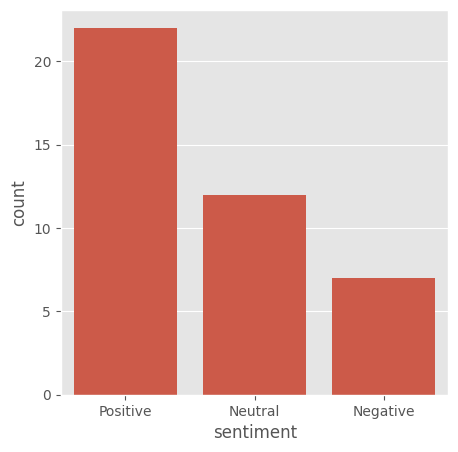

In [29]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

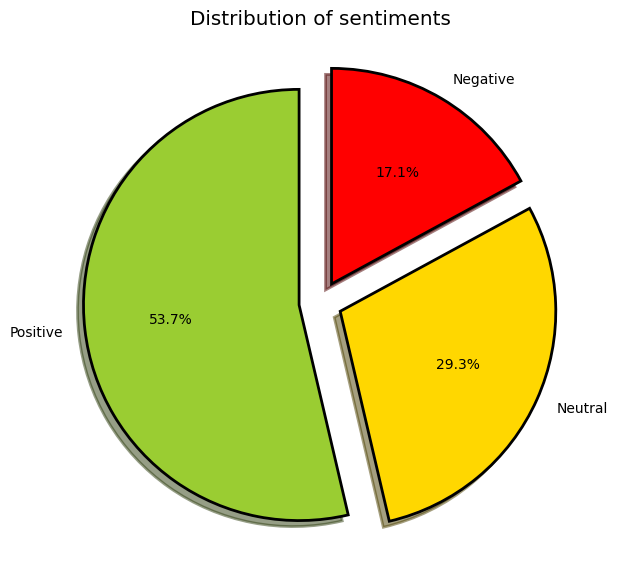

In [30]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [31]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Text,polarity,sentiment
6,and then I realized adventure was the best wa...,0.9250,Positive
27,Watch if u havent \n\nHipHopMusic RAP Rapper D...,0.7000,Positive
23,London Today if someone gets the Petrol He wo...,0.6500,Positive
18,Some more stellar get it night time photograph...,0.5625,Positive
14,Tony Blair Institution Indias 15 top NGOs to a...,0.5000,Positive


**Overall, the word cloud suggests that people in London are tweeting positively about the new iPhone 3, possibly due to its price or camera quality. Some users might be from India or interested in other iPhone models as well.**

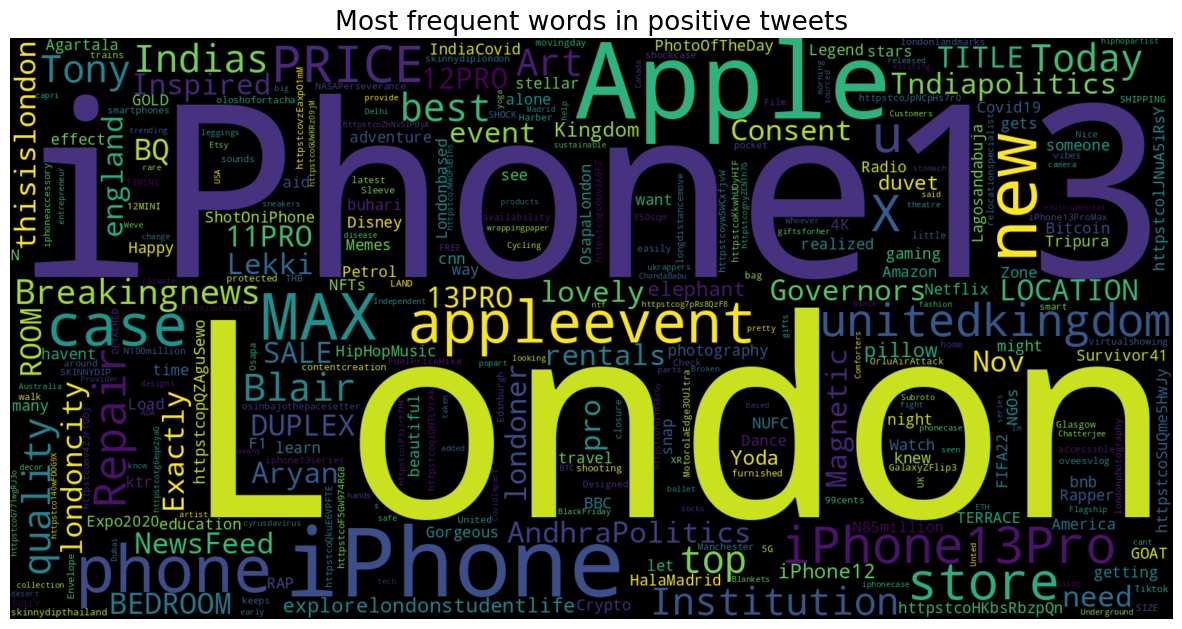

In [32]:
text = ' '.join([word for word in pos_tweets['Text']])
plt.figure(figsize=(15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [33]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,Text,polarity,sentiment
24,Hey UPSCanada UPS thanks for delaying my deli...,-0.021212,Negative
17,iPhone13 You can steal mopeds and not damage y...,-0.100000,Negative
35,iPhone13 Release Date Expected To Be On Sept 1...,-0.100000,Negative
13,Capri Leggings \nAccess our stores through the...,-0.166667,Negative
40,Apple wan release iPhone 13 when I no even use...,-0.200000,Negative


#**Most frequent words in negative tweets**

**This code effectively creates a visual representation of the most frequent words from the most negative tweets, allowing you to explore which words stand out in those tweets and potentially understand the aspects of the iPhone 13 that users are unhappy with.**

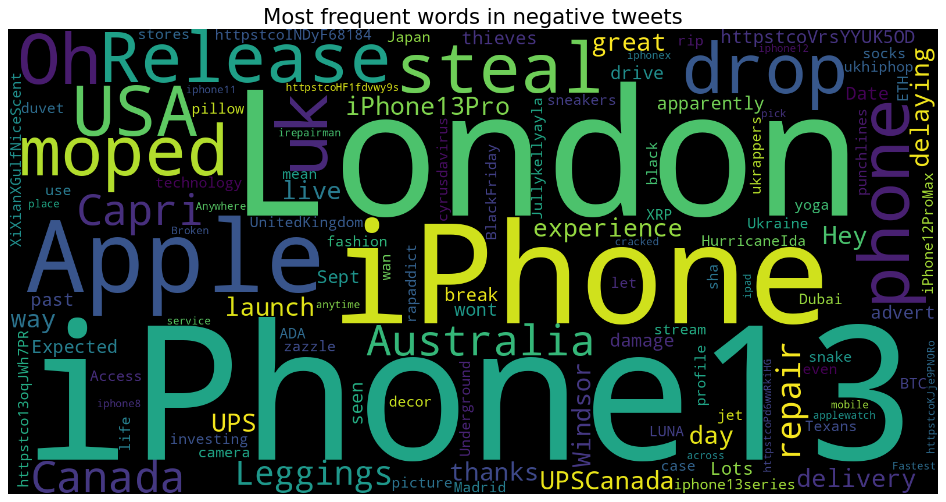

In [67]:
text = ' '.join([word for word in neg_tweets['Text']])
plt.figure(figsize=(15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [35]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Text,polarity,sentiment
4,London Pilotlife aviation iphone13 httpstcoDBc...,0.0,Neutral
5,FlakPhoto One I took on the iPhone13 on Friday...,0.0,Neutral
8,Shard London CaseMate iPhone Case iPhone iPhon...,0.0,Neutral
11,Comforters\nAccess our stores through the prof...,0.0,Neutral
19,Cam saracie la 2 dintre iPhone13 Au pus astia ...,0.0,Neutral


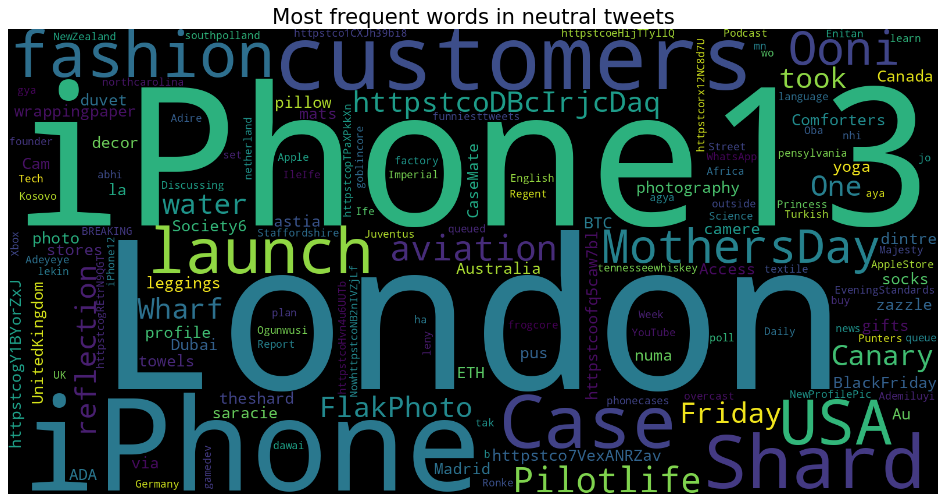

In [68]:
text = ' '.join([word for word in neutral_tweets['Text']])
plt.figure(figsize=(15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['Text'])

In [39]:
feature_names = vect.get_feature_names_out()

In [40]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 30 features:\n {}".format(feature_names[:30]))

Number of features: 1434

First 30 features:
 ['10' '10 mn' '11' '11 11pro' '11pro' '11pro 11pro' '11pro max' '12'
 '12 12mini' '1290' '1290 thb' '12mini' '12mini 12pro' '12pro'
 '12pro 12pro' '12pro max' '13' '13 13mini' '13 agya' '13 pro' '13 report'
 '13 series' '13 when' '13mini' '13mini 13pro' '13pro' '13pro 13pro'
 '13pro max' '14' '14 httpstcoindyf68184']


In [41]:
X = text_df['Text']
Y = text_df['sentiment']
X = vect.fit_transform(X)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=25)


In [43]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (28, 1434)
Size of y_train: (28,)
Size of x_test: (13, 1434)
Size of y_test: (13,)


In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logreg=LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 61.54%


In [55]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[0 1 1]
 [0 2 2]
 [0 1 6]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
     Neutral       0.50      0.50      0.50         4
    Positive       0.67      0.86      0.75         7

    accuracy                           0.62        13
   macro avg       0.39      0.45      0.42        13
weighted avg       0.51      0.62      0.56        13



**This code snippet effectively calculates and visualizes the confusion matrix for your logistic regression model's performance on the test data. The confusion matrix provides valuable insights into how well your model classified each class and helps identify areas for potential improvement.**

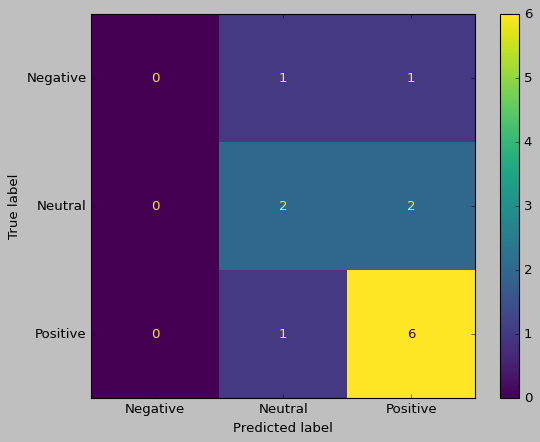

In [57]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [58]:
from sklearn.svm import SVC

In [59]:
model = SVC(kernel="linear",gamma='auto',C=2)

In [60]:
svm=model.fit(x_train,y_train)

In [61]:
pred=svm.predict(x_test)

In [62]:
pred

array(['Positive', 'Negative', 'Neutral', 'Positive', 'Neutral',
       'Neutral', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Positive', 'Neutral', 'Neutral'], dtype=object)

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [63]:
from sklearn import metrics

In [65]:
# Evaluating model performance
metrics.confusion_matrix(pred,y_test)

array([[0, 1, 0],
       [1, 3, 2],
       [1, 0, 5]])

In [66]:
metrics.accuracy_score(pred,y_test)

0.6153846153846154